# Believing cojunctions - simulation

Setting parameters:

In [1]:
import numpy as np 
threshold = 0.8
max_con_size = 2
loops = 50
cj_nr = 5000 # number of conjunctions
pr_nr = 10000 # number of believed propositions
# simulations = [1001,101,11,7,5,3] # simulated number of levels
simulations = [1001,101,51,21,15,11,9,7,5,3]

In [2]:
def round_to_lev(value, nr):
    '''
    Rounds 'value' according to the 0-1 scale with 'nr' of levels
    :param value: real number to be rounded
    :param nr: nr of levels used for calculations
    :returns: rounded value
    '''
    if (nr == 1001):
        return round(value,3)
    if (nr == 101):
        return round(value,2)
    if (value == 1):
        return 1
    if (value == 0):
        return 0
    diff = 1 / (nr-2)
    err = 1 
    level = diff/2
    result = 0
    for _ in range(nr-2):
        if (abs(value-level)<err):
            err = abs(value-level)
            result = level
        level += diff
    return result

Creating random conjunctions out of propositions, counting those that are above the threshold and comparing the results for different accuracies.

In [3]:
def simulate(levels, prop, cj_nr=5000):
    '''
    :param levels: list of levels to be simulated, e.g. [9,7,5]
    :param prop: list of degrees of belief for believed propositions, e.g. [0.79, 0.8, 0.64 ...]
    :returns: 
        (nr of conjunctions that shouldn't be believed (list for each accuracy level),
        nr of conjunctions that should be believed but aren't (list for each accuracy level), 
        nr of conjunctions that should be believed) 
    '''
    n = len(levels) # number of simulations - each simulation for different amount of levels
    mistaken_bel = [0]*n # list with nr of wrongly believed conjunctions for each simulation (level)
    mistaken_not_bel = [0]*n # list with nr of conjunctions that should be believed but aren't for each simulation
    believed_conj = 0
    for _ in range(cj_nr):
        c_size = np.random.randint(2, max_con_size+1) # each conjunction has random amount of conjuncts - c_size
        c_prop = np.random.randint(0, pr_nr, c_size) # selecting propositions randomly
        conj_pr = [1]*n # list of rounded probabilites of conjunctions for each simulation 
        conj_float = 1        
        for i in c_prop:
            conj_float *= propositions[i]
            for j in range(n):
                # conj_pr[j] = round_to_lev(conj_pr[j]*round_to_lev(propositions[i],levels[j]),levels[j])
                conj_pr[j] *= round_to_lev(propositions[i],levels[j])
        # threshold = np.random.rand()*0.5+0.5
        conj_pr[j] = round_to_lev(conj_pr[j], levels[j])
        justified = False
        if (conj_float > threshold):
                believed_conj +=1
                justified = True
        for i in range(n):
            c = conj_pr[i]
            if ((c > round_to_lev(threshold,levels[i])) & (not justified)):
                mistaken_bel[i]+=1
            if ((c <= round_to_lev(threshold,levels[i])) & justified):
                mistaken_not_bel[i]+=1 
    return (mistaken_bel, mistaken_not_bel, believed_conj)

Performing simulation:

In [4]:
results_b = []
results_nb = []
bel_conj_nr=0

for _ in range(loops):    
    propositions = np.random.random(pr_nr)*(1-threshold)+threshold 
    (mist_b, mist_nb, believed_conj) = simulate(simulations, propositions, cj_nr)
    results_b.append(mist_b)
    results_nb.append(mist_nb)
    bel_conj_nr += believed_conj
bel_conj_nr /= loops

Counting mistaken beliefs:

In [5]:
error_b, error_nb = [], []
for i in range(len(simulations)):
    b_avg, nb_avg = 0, 0
    for r in results_b:
        b_avg+=r[i]
    for r in results_nb:
        nb_avg+=r[i]
    b_avg/=len(results_b)  
    nb_avg/=len(results_nb) 
    error_b.append(b_avg)
    error_nb.append(nb_avg)
print("Threshold:", threshold)
print("Number of conjuncts: [2,{}]".format(max_con_size))
print("All conjunctions:",cj_nr)    
print("Conjunctions above the threshold (no rounding):", bel_conj_nr)    
print("Results for different number of levels:")
for s in range(len(simulations)):
    accuracy = 1-(error_b[s]+error_nb[s])/cj_nr
    if (bel_conj_nr-error_nb[s])+error_b[s]>0:
        precision = (bel_conj_nr-error_nb[s])/((bel_conj_nr-error_nb[s])+error_b[s])
    else:
        precision = 0   
    recall = (bel_conj_nr-error_nb[s])/bel_conj_nr
    print("levels: {} | accuracy: {:.3f} | precision: {:.3f} | recall: {:.3f} | mistaken bel: {} | mistaken not bel: {}" 
          .format(simulations[s], accuracy, precision, recall, error_b[s], error_nb[s]))

Threshold: 0.8
Number of conjuncts: [2,2]
All conjunctions: 5000
Conjunctions above the threshold (no rounding): 2697.18
Results for different number of levels:
levels: 1001 | accuracy: 0.998 | precision: 0.998 | recall: 0.999 | mistaken bel: 4.4 | mistaken not bel: 3.5
levels: 101 | accuracy: 0.982 | precision: 0.983 | recall: 0.984 | mistaken bel: 46.1 | mistaken not bel: 42.92
levels: 51 | accuracy: 0.943 | precision: 0.991 | recall: 0.903 | mistaken bel: 22.08 | mistaken not bel: 262.16
levels: 21 | accuracy: 0.878 | precision: 1.000 | recall: 0.774 | mistaken bel: 0.8 | mistaken not bel: 608.66
levels: 15 | accuracy: 0.884 | precision: 0.975 | recall: 0.805 | mistaken bel: 55.76 | mistaken not bel: 525.16
levels: 11 | accuracy: 0.768 | precision: 0.995 | recall: 0.572 | mistaken bel: 7.38 | mistaken not bel: 1153.82
levels: 9 | accuracy: 0.831 | precision: 0.861 | recall: 0.818 | mistaken bel: 355.34 | mistaken not bel: 491.08
levels: 7 | accuracy: 0.461 | precision: 0.000 | recal

In [6]:
import matplotlib.pyplot as plt
total_error = np.array(error_b)+np.array(error_nb)
plt.plot(simulations, total_error)
plt.xlabel('accuracy levels')
plt.ylabel('mistaken beliefs')
plt.title('Rounding errors')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

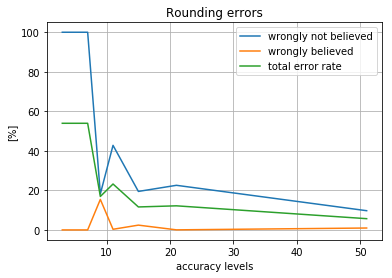

In [7]:
error_rate = np.array(error_nb) / bel_conj_nr * 100
plt.plot(simulations[2:], error_rate[2:])
error_rate = np.array(error_b) / (cj_nr-bel_conj_nr) * 100
plt.plot(simulations[2:], error_rate[2:])
error_rate = total_error / cj_nr * 100
plt.plot(simulations[2:], error_rate[2:])
plt.grid(True)
plt.xlabel('accuracy levels')
plt.ylabel('[%]')
plt.legend(['wrongly not believed', 'wrongly believed','total error rate'])
plt.title('Rounding errors')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

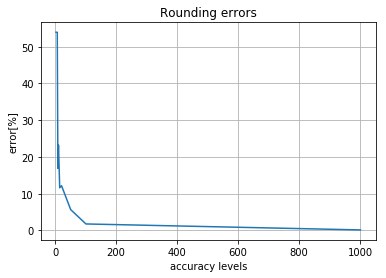

In [8]:
error_rate = total_error / cj_nr * 100
plt.plot(simulations, error_rate)
plt.grid(True)
plt.xlabel('accuracy levels')
plt.ylabel('error[%]')
#plt.legend(['wrongly not believed', 'wrongly believed','total error rate'])
plt.title('Rounding errors')
plt.show